### Figure 3B

In this figure we integrate epigenetic information from the H3K9ac mark (acetylation) and correlate it with the flux of the Acetyl-CoA cosubstrate.

In [98]:
import csv
import scipy 
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import linregress
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [99]:
#Import matrix containing the epigenetic data of the H3K9ac mark
df_h3k9ac=pd.read_csv("/home/bguzman/jupyter/UI/YMC/analysis/Epiflux/dfi_T_15_ac.csv")
df_h3k9ac_gene=df_h3k9ac.set_index('gene_id')

In [100]:
#Import vector with Acetyl-CoA fluxes normalized by the sum of all fluxes
df_ac=pd.read_csv("vectorAC_15flux.csv",index_col=0)
df_ac

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15
EX_Pac/vi,0.000154,0.000151,0.000164,0.000123,0.000114,0.00011,0.000131,0.000135,0.000135,0.000155,0.000164,0.000168,0.000163,0.000182,0.000157


To verify the correlation between the Acetyl-CoA flux vector and the H3K9ac epigenetic mark the following was done:

In [101]:
# Create a list of vectors from the data in df_h3k9ac,
#where each vector corresponds to a gene_id and contains all the values associated with that gene_id in the df.
list_genes=[]
for k in range(df_h3k9ac.shape[0]):
    list_genes.append(df_h3k9ac["gene_id"][k])
    
dicc_genes={}
for index, row in df_h3k9ac.iterrows(): 
    if row["gene_id"] not in dicc_genes:
        dicc_genes[row["gene_id"]]=0
        
        
rows=df_h3k9ac.shape[0]
dicc_genes={}
for i in range(rows):
    row= (df_h3k9ac.iloc[i])
    new_list=[]
    for element in row:
        new_list.append(element)
    dicc_genes[new_list[0]]=new_list[1::]
        

list_vectors=[]
for i,k in dicc_genes.items():
    list_vectors.append(k)
#list_vectors   


In [102]:
#Calculate coef. correlation by vectors
def cal_coef_corr(a,b):
  """
  Calculates the given correlation coefficient
  two vectors a and b.

  This function receives "a" and "b" as lists
  """
  #Create arrays a and b from lists
  #This, in order to do operations between vectors
  array_a = np.array(a)
  array_b = np.array(b)

  #Calculate the averages of the vectors a and b
  mean_a = np.mean(a)
  mean_b = np.mean(b)

  #Calculate the distance of each data point from its mean
  distance_a = a-mean_a*np.array([1]*len(a))
  distance_b = b-mean_b*np.array([1]*len(b))

  # Calculate the dot product between these two distances
  # What has been the numerator of the equation of correlation coefficients
  numerator = np.dot(distance_a,distance_b)

   #Calculate the norm of â and b̂
   #Construction of the denominator
  norm_a = np.linalg.norm(distance_a)
  norm_b = np.linalg.norm(distance_b)

  denominator = norm_a*norm_b

  #Calculate the correlation coefficient
  coef_corr = numerator/denominator
  return coef_corr

#Add Vectors
list_corr=[]
for i in range(len(list_vectors)):
    list_corr.append(cal_coef_corr(list_vectors[i],np.array(df_ac)[0]))


In [103]:
#Add correlation column to df
dfc=pd.DataFrame(list_corr,index =df_h3k9ac["gene_id"],columns = ['Coef_correlation']) #dfc contains the correlation coefficient of all genes
dfi_R=df_h3k9ac_gene
dfi_R['Coef_correlation']=dfc['Coef_correlation']
dfi_hc=df_h3k9ac_gene[dfi_R['Coef_correlation']>= .75]
dfi_hc #dfi_hc contains the coef. correlation greater than 0.7

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,Coef_correlation
gene_id,,,,,,,,,,,,,,,,
YAL055W,670,691,610,287,382,503,520,410,422,435,589,698,850.0,912,752,0.780395
YAL054C,333,408,281,118,100,130,174,133,233,284,301,211,342.0,391,474,0.757870
YAL049C,633,628,784,405,260,481,483,411,486,578,788,646,704.0,604,773,0.800841
YAR062W,246,223,263,181,171,167,227,157,272,331,366,455,403.0,331,280,0.784491
YBL106C,405,337,407,329,327,301,302,266,318,392,443,428,434.5,411,393,0.826980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPL139C,620,691,767,441,357,427,428,567,539,474,574,612,592.0,657,754,0.760763
YPL123C,548,642,480,368,205,405,410,408,469,527,537,734,537.0,612,681,0.796239
YPL113C,677,782,627,231,255,324,320,384,374,444,855,785,727.0,709,749,0.860619


In [104]:
#Add column p-value to df
list_pvalue=[]

for i in range(len(list_vectors)):
    a=list_vectors[i]
    b=np.array(df_ac)[0]
    t_statistic, p_value = ttest_ind(a, b)
    list_pvalue.append(p_value)

dfp=pd.DataFrame(list_pvalue,index =df_h3k9ac["gene_id"],columns = ['pvalue']) #dfp contains the pvalue of all genes

#Matrix containing the most significant correlation coefficient and pvalue
dfi_p=dfi_hc
dfi_p['pvalue']=dfp['pvalue']
dfi_pv=dfi_hc[dfi_p['pvalue']<= .0001]

#df ordered from highest correlation to lowest correlation
df_sorted = dfi_pv.sort_values('Coef_correlation', ascending=False)
df_sorted


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,Coef_correlation,pvalue
gene_id,,,,,,,,,,,,,,,,,
YKR009C,766,840,705,305,190,232,291,338,394,436,945,802,863.0,1010,899,0.907694,1.230940e-08
YGR066C,528,462,520,298,255,300,342,248,335,423,444,511,457.5,544,484,0.898290,4.050425e-15
YJL163C,597,579,601,216,165,334,403,394,435,468,522,539,509.5,700,590,0.891584,9.031819e-13
YPR006C,750,840,657,209,288,344,464,571,500,557,867,688,768.5,960,789,0.890399,2.148345e-11
YGL209W,309,319,303,196,222,182,271,164,295,370,399,437,442.5,558,418,0.881780,6.284926e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YGL153W,779,985,896,539,656,500,425,518,480,544,972,909,848.0,872,890,0.751099,5.251858e-14
YDR369C,458,364,353,231,247,243,268,257,337,337,455,562,472.5,355,503,0.750980,1.214466e-13
YOR364W,1124,1496,1508,871,781,745,661,755,681,631,1367,1240,1366.0,1488,1044,0.750722,1.290278e-12


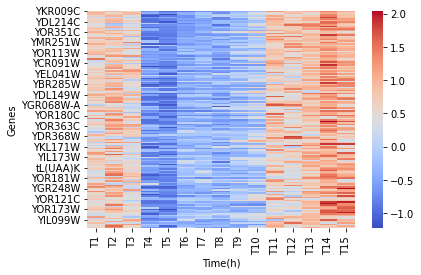

In [105]:
#heatmap of genes highly correlated with Acetyl-CoA vector
dfi_pv_norm_hc=df_sorted.apply(lambda x: (x-x.mean())/x.std(), axis = 1) #normalization
ax=sns.heatmap(dfi_pv_norm_hc.iloc[:,0:15], cmap=sns.color_palette("coolwarm", as_cmap=True)
)

ax.set(xlabel="Time(h)", ylabel="Genes")
plt.savefig("hc_ACOA.pdf")

In [106]:
#To know the names of the genes with the highest corr and the lowest pvalue
#and submit them to gene ongology using the DAVID tool:
for index,valor in df_sorted["pvalue"].items():
    print(index) 


YKR009C
YGR066C
YJL163C
YPR006C
YGL209W
YNL204C
YER015W
YDL214C
YNR067C
YJL216C
YPL276W
YER014C-A
YHR137W
YOR393W
YOR351C
YPL113C
YKL187C
YPL275W
YBR280C
YNL202W
YOR388C
YMR251W
YKL188C
YLR213C
YNL194C
YNL009W
YOR347C
YHR073C-B
YOR113W
YLR284C
YOL147C
YJL153C
YCL074W
YKR066C
YJR020W
YCR091W
YJR019C
YMR196W
YMR304W
YLR346C
YOL146W
YGR247W
YEL041W
YBL106C
YKR050W
YOR215C
YOR273C
YDL246C
YLR299C-A
YBR285W
YGR236C
YJL222W
YIL160C
YMR169C
YGL028C
YML042W
YDL149W
YDL110C
YBR026C
YOR100C
YMR160W
YBR149W
YJR036C
YGR068W-A
YKR105C
YMR017W
YGR225W
YGL205W
YLR162W-A
YNL203C
YOR180C
YAL049C
YOR214C
YKR067W
YGR088W
YBR214W
YPL281C
YOR363C
YPL123C
YMR303C
YDR536W
YGL179C
YLR202C
YDR328C
YDR368W
YHR213W
YIL033C
YOR352W
YDR487C
YFL015C
YAR062W
YKL171W
YBR027C
YGR224W
YNR069C
YDR256C
YJL045W
YAL055W
YIL173W
YHR139C
YJR159W
YLR460C
YKL043W
YDR380W
YLR285W
tL(UAA)K
YOR185C
YOR084W
YNL332W
YDL215C
YPR151C
YOR374W
YOR181W
YBR132C
YFL058W
YLR154W-A
YMR252C
YIL159W
YIL124W
YGR248W
YPL139C
YPL201C
YML131W
YJR